In [1]:
import pandas as pd
# pd.set_option('max_colwidth', 50)
# set this if you need to
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
East1 = pd.read_csv('../data/yelp_businesses.csv', parse_dates=True)

In [3]:
East1.head()

,Unnamed: 0,id,name,is_closed,image_url,url,mobile_url,phone,display_phone,review_count,...,snippet_text,location_address,location_display_address,location_city,location_state_code,location_postal_code,location_country_code,location_cross_streets,location_neighborhoods,location_coordinate
0,0,fort-scott-field-at-the-presidio-san-francisco,False,Fort Scott Field at the Presidio,https://s3-media4.fl.yelpcdn.com/bphoto/LZVhxP...,https://www.yelp.com/biz/fort-scott-field-at-t...,https://m.yelp.com/biz/fort-scott-field-at-the...,4.155614e+09,+1-415-561-4200,6.0,...,Presidio Habitats has / had an art installatio...,[],"[Presidio, San Francisco, CA 94129]",San Francisco,CA,94129.0,US,NaN,[Presidio],"{u'latitude': 37.8031542208, u'longitude': -12..."
1,1,kharma-sucre-san-francisco,False,Kharma Sucre,https://s3-media1.fl.yelpcdn.com/bphoto/sjeS8g...,https://www.yelp.com/biz/kharma-sucre-san-fran...,https://m.yelp.com/biz/kharma-sucre-san-franci...,4.156526e+09,+1-415-652-6162,1.0,...,"I rarely leave reviews, but I had such a great...",[101 Horne Ave.],"[101 Horne Ave., Bayview-Hunters Point, San Fr...",San Francisco,CA,94124.0,US,NaN,[Bayview-Hunters Point],"{u'latitude': 37.727329693, u'longitude': -122..."
2,2,doggie-time-san-francisco-2,False,Doggie Time,https://s3-media4.fl.yelpcdn.com/bphoto/rU3Yzs...,https://www.yelp.com/biz/doggie-time-san-franc...,https://m.yelp.com/biz/doggie-time-san-francis...,4.152507e+09,+1-415-250-6951,12.0,...,Theo is what all dog owners could want in a do...,[3245 Geary Blvd],"[3245 Geary Blvd, Laurel Heights, San Francisc...",San Francisco,CA,94118.0,US,Spruce St & Parker Ave,"[Laurel Heights, Inner Richmond]","{u'latitude': 37.7813, u'longitude': -122.45382}"
3,3,presidio-nursery-san-francisco,False,Presidio Nursery,https://s3-media1.fl.yelpcdn.com/bphoto/qKvyb1...,https://www.yelp.com/biz/presidio-nursery-san-...,https://m.yelp.com/biz/presidio-nursery-san-fr...,4.155615e+09,+1-415-561-4826,5.0,...,I went here a couple of times in the past mont...,[1249 Appleton St],"[1249 Appleton St, Presidio, San Francisco, CA...",San Francisco,CA,94129.0,US,NaN,[Presidio],"{u'latitude': 37.80084332, u'longitude': -122...."
4,4,balance-san-francisco,False,Balance,https://s3-media1.fl.yelpcdn.com/bphoto/V-6nW9...,https://www.yelp.com/biz/balance-san-francisco...,https://m.yelp.com/biz/balance-san-francisco?a...,4.407594e+09,+1-440-759-4347,5.0,...,I have been seeing Danielle for a couple of mo...,[],"[Presidio, San Francisco, CA 94129]",San Francisco,CA,94129.0,US,NaN,[Presidio],"{u'latitude': 37.8011017, u'longitude': -122.4..."


In [4]:
bars = East1
bars.id.value_counts().head(25)

dj-purple-dance-karaoke-san-francisco                   2
jazcat-mobile-entertainment-san-rafael                  2
tarot-perspectives-san-francisco                        2
dj-roost-uno-san-francisco                              2
heart-of-gold-djs-san-francisco                         2
magician-kevin-blake-san-francisco-3                    2
golden-dragon-fortunes-san-francisco                    2
i-j-smith-jazz-combo-san-francisco                      2
bay-area-dj-and-karaoke-event-services-san-francisco    2
david-gerard-san-francisco                              2
benny-be-music-productions-san-francisco-2              2
dj-matteo-and-associates-san-francisco-4                2
sf-on-tap-tours-san-francisco-3                         2
swing-or-nothing-san-francisco                          2
mcallister-music-studio-san-francisco                   2
the-big-quiz-thing-san-francisco                        2
die-maschinen-san-francisco                             1
soy-and-tofu-f

In [5]:
bars.columns

Index([u'Unnamed: 0', u'id', u'name', u'is_closed', u'image_url', u'url',
       u'mobile_url', u'phone', u'display_phone', u'review_count',
       u'categories', u'rating', u'snippet_text', u'location_address',
       u'location_display_address', u'location_city', u'location_state_code',
       u'location_postal_code', u'location_country_code',
       u'location_cross_streets', u'location_neighborhoods',
       u'location_coordinate'],
      dtype='object')

In [6]:
print bars.shape
bars.drop_duplicates('id')
print bars.shape

(2497, 22)
(2497, 22)


In [7]:
bars.drop_duplicates(['id', 'name','location_address'])
bars[bars.id=='meshi-sushi-san-francisco']

,Unnamed: 0,id,name,is_closed,image_url,url,mobile_url,phone,display_phone,review_count,...,snippet_text,location_address,location_display_address,location_city,location_state_code,location_postal_code,location_country_code,location_cross_streets,location_neighborhoods,location_coordinate


In [8]:
bars[(bars.rating<=1)&(bars.review_count>10)]

,Unnamed: 0,id,name,is_closed,image_url,url,mobile_url,phone,display_phone,review_count,...,snippet_text,location_address,location_display_address,location_city,location_state_code,location_postal_code,location_country_code,location_cross_streets,location_neighborhoods,location_coordinate
666,666,ramen-yokocho-fest-2014-san-francisco,False,Ramen Yokocho Fest 2014,https://s3-media1.fl.yelpcdn.com/bphoto/JhxJ2r...,https://www.yelp.com/biz/ramen-yokocho-fest-20...,https://m.yelp.com/biz/ramen-yokocho-fest-2014...,NaN,NaN,171.0,...,"Ramen is fine, Tried Tatsunoya, Mehon and Matt...",[Japantown Peace Plz],"[Japantown Peace Plz, Japantown, San Francisco...",San Francisco,CA,94115.0,US,NaN,"[Japantown, Lower Pacific Heights]","{u'latitude': 37.7851495413, u'longitude': -12..."
2336,2336,cosmic-run-san-francisco,False,Cosmic Run,https://s3-media1.fl.yelpcdn.com/bphoto/Z9GjTZ...,https://www.yelp.com/biz/cosmic-run-san-franci...,https://m.yelp.com/biz/cosmic-run-san-francisc...,NaN,NaN,58.0,...,What a phenomenal event! One of the best Vietn...,[Candlestick Park],"[Candlestick Park, Bayview-Hunters Point, San ...",San Francisco,CA,94124.0,US,NaN,[Bayview-Hunters Point],"{u'latitude': 37.7134399, u'longitude': -122.3..."


In [144]:
bars.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1,categories,deals,display_phone,gift_certificates,id,image_url,is_claimed,...,name,phone,rating,rating_img_url,rating_img_url_large,rating_img_url_small,review_count,snippet_image_url,snippet_text,url
0,0,0.0,0.0,"[[Pubs, pubs]]",NaN,+1-415-928-2414,NaN,the-black-horse-london-pub-san-francisco,https://s3-media4.fl.yelpcdn.com/bphoto/JXwoNn...,True,...,The Black Horse London Pub,4.159282e+09,4.5,https://s3-media2.fl.yelpcdn.com/assets/2/www/...,https://s3-media4.fl.yelpcdn.com/assets/2/www/...,https://s3-media2.fl.yelpcdn.com/assets/2/www/...,290,https://s3-media2.fl.yelpcdn.com/photo/wUMBjgu...,This is the best bar in San Francisco. Hell it...,https://www.yelp.com/biz/the-black-horse-londo...


In [87]:
bars.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'Unnamed: 0.1', u'categories',
       u'deals', u'display_phone', u'gift_certificates', u'id', u'image_url',
       u'is_claimed', u'is_closed', u'location.address', u'location.city',
       u'location.coordinate.latitude', u'location.coordinate.longitude',
       u'location.country_code', u'location.cross_streets',
       u'location.display_address', u'location.geo_accuracy',
       u'location.neighborhoods', u'location.postal_code',
       u'location.state_code', u'location_address', u'location_city',
       u'location_coordinate_latitude', u'location_coordinate_longitude',
       u'location_country_code', u'location_cross_streets',
       u'location_display_address', u'location_geo_accuracy',
       u'location_neighborhoods', u'location_postal_code',
       u'location_state_code', u'menu_date_updated', u'menu_provider',
       u'mobile_url', u'name', u'phone', u'rating', u'rating_img_url',
       u'rating_img_url_large', u'rating_img_url_small

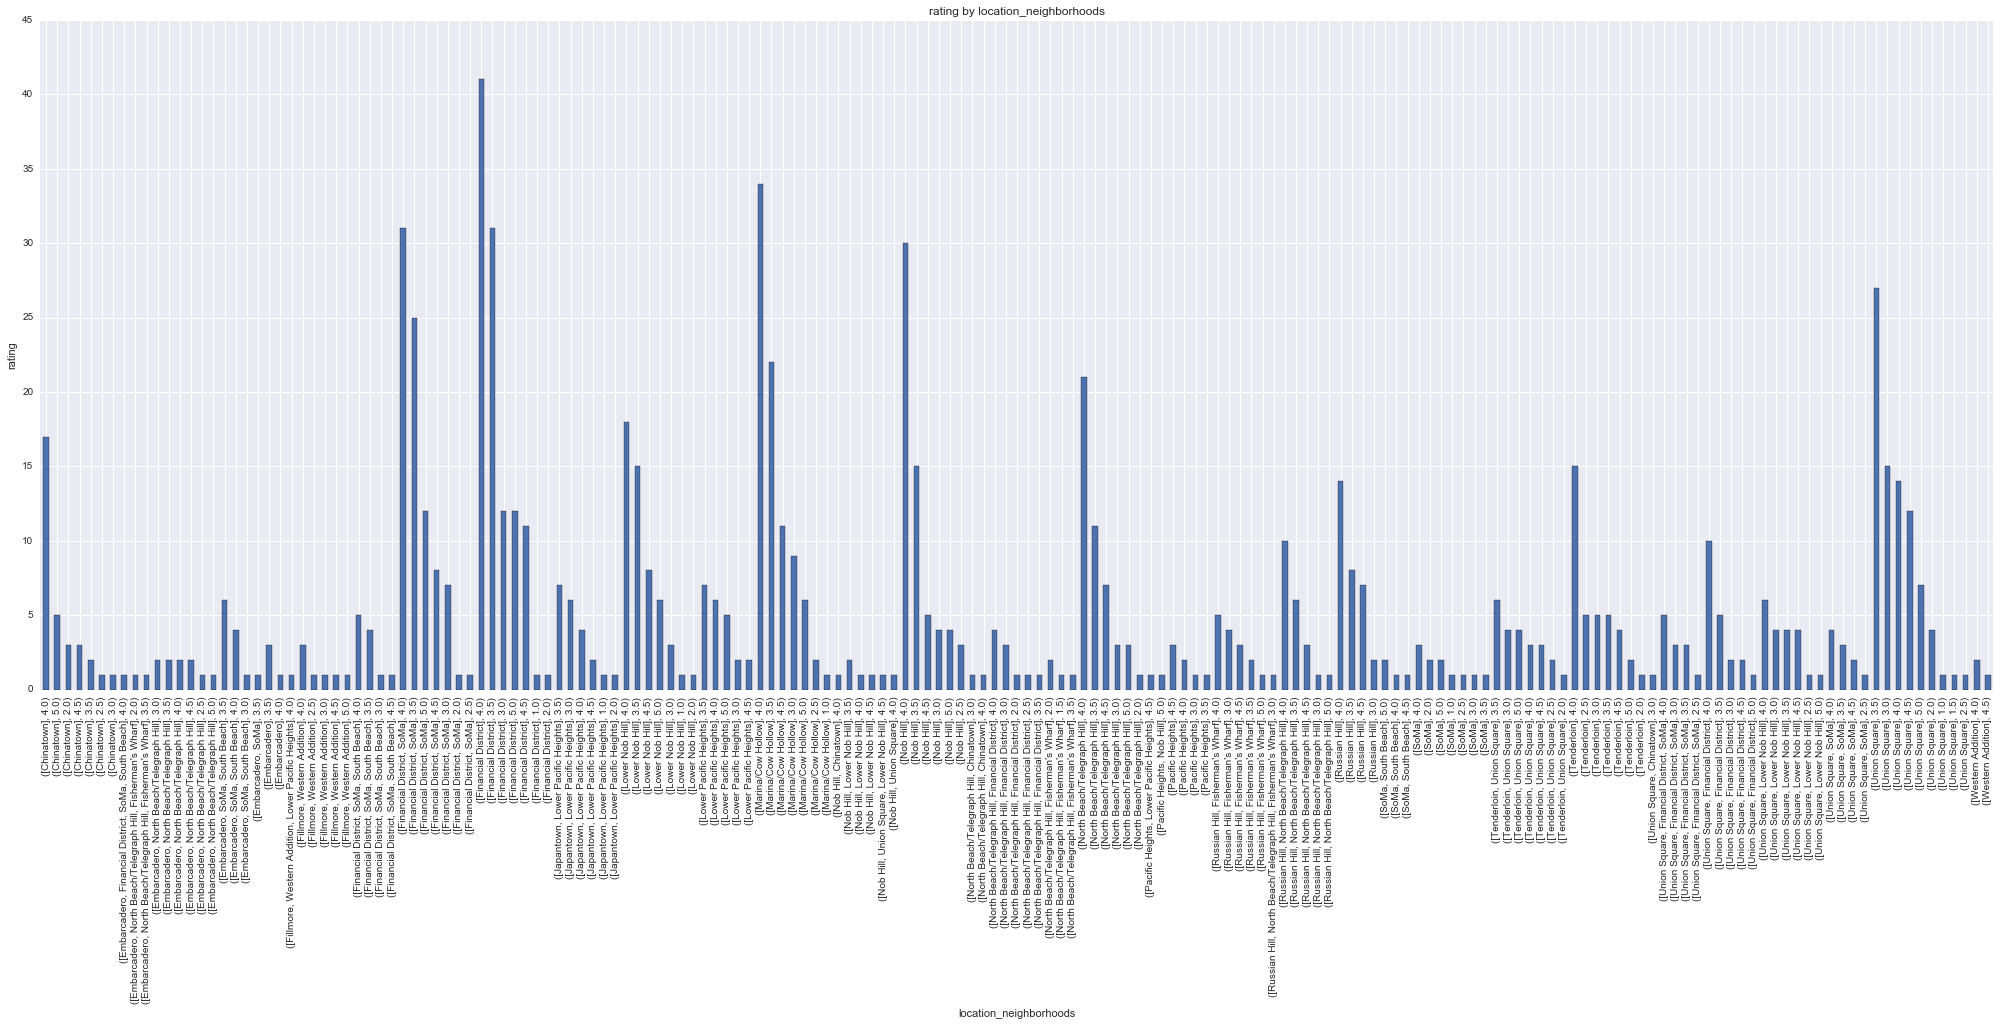

In [92]:
cols = ['location_neighborhoods', 'rating']
bars.groupby('location_neighborhoods')rating.value_counts().plot(kind='bar', title='rating by location_neighborhoods', figsize = (35,12))
plt.xlabel('location_neighborhoods')
plt.ylabel('rating')

In [100]:
#bars.boxplot(column='rating', by='categories', figsize = (24,10))

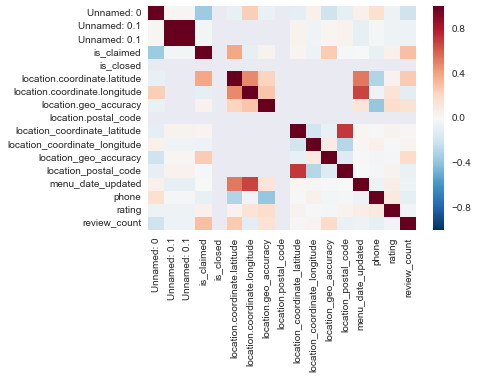

In [103]:
sns.heatmap(bars.corr())

In [107]:
bars.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'Unnamed: 0.1', u'categories',
       u'deals', u'display_phone', u'gift_certificates', u'id', u'image_url',
       u'is_claimed', u'is_closed', u'location.address', u'location.city',
       u'location.coordinate.latitude', u'location.coordinate.longitude',
       u'location.country_code', u'location.cross_streets',
       u'location.display_address', u'location.geo_accuracy',
       u'location.neighborhoods', u'location.postal_code',
       u'location.state_code', u'location_address', u'location_city',
       u'location_coordinate_latitude', u'location_coordinate_longitude',
       u'location_country_code', u'location_cross_streets',
       u'location_display_address', u'location_geo_accuracy',
       u'location_neighborhoods', u'location_postal_code',
       u'location_state_code', u'menu_date_updated', u'menu_provider',
       u'mobile_url', u'name', u'phone', u'rating', u'rating_img_url',
       u'rating_img_url_large', u'rating_img_url_small

In [106]:
bars[bars.id=='rye-san-francisco']

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1,categories,deals,display_phone,gift_certificates,id,image_url,is_claimed,...,name,phone,rating,rating_img_url,rating_img_url_large,rating_img_url_small,review_count,snippet_image_url,snippet_text,url
10,10,10.0,10.0,"[[Lounges, lounges]]",NaN,+1-415-474-4448,NaN,rye-san-francisco,https://s3-media2.fl.yelpcdn.com/bphoto/-fv6K7...,True,...,Rye,4.154744e+09,4.0,https://s3-media4.fl.yelpcdn.com/assets/2/www/...,https://s3-media2.fl.yelpcdn.com/assets/2/www/...,https://s3-media4.fl.yelpcdn.com/assets/2/www/...,1285,https://s3-media2.fl.yelpcdn.com/photo/D11_fce...,It's pretty cool that you can get a $4 Modelo ...,https://www.yelp.com/biz/rye-san-francisco?adj...


In [27]:
bars.location_neighborhoods.value_counts()

[Financial District]                                             109
[Financial District, SoMa]                                        85
[Marina/Cow Hollow]                                               85
[Union Square]                                                    82
[Nob Hill]                                                        61
[Lower Nob Hill]                                                  52
[North Beach/Telegraph Hill]                                      46
[Tenderloin]                                                      37
[Chinatown]                                                       32
[Russian Hill]                                                    31
[Tenderloin, Union Square]                                        23
[Lower Pacific Heights]                                           22
[Japantown, Lower Pacific Heights]                                21
[Russian Hill, North Beach/Telegraph Hill]                        21
[Union Square, Financial District]